In [28]:
# https://www.kaggle.com/datasets/femionakunle/student-performance-prediction-copied

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_performance_prediction_copied.csv")

In [3]:
df.shape

(40000, 7)

In [4]:
df.tail()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No
39999,S40000,11.8,55.1,68.5,No,Bachelor,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [7]:
# df = df.dropna()

In [8]:
df.shape

(40000, 7)

In [9]:
df = df[[ 'Study Hours per Week', 'Attendance Rate',
       'Previous Grades', 'Participation in Extracurricular Activities',
       'Parent Education Level', 'Passed']]

In [10]:
df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12.5,NaN,75.0,Yes,Master,Yes
1,9.3,95.3,60.6,No,High School,No
2,13.2,NaN,64.0,No,Associate,No
3,17.6,76.8,62.4,Yes,Bachelor,No
4,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...
39995,15.6,93.8,51.4,Yes,Master,No
39996,11.3,66.4,64.2,No,Doctorate,Yes
39997,13.1,65.6,38.1,No,Bachelor,No
39998,14.1,74.9,NaN,Yes,Master,No


In [11]:
df.loc[: , 'Participation in Extracurricular Activities'] = df["Participation in Extracurricular Activities"].apply(lambda x : 1 if x == "Yes" else 0 )

In [12]:
df.loc[: , "Parent Education Level"] = df["Parent Education Level"].replace({
    'Associate': 0 , 
    'Bachelor' : 1 , 
    'Doctorate' : 2 , 
    'High School' : 3, 
    'Master' : 4 
})

/tmp/ipykernel_31040/1155947586.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[: , "Parent Education Level"] = df["Parent Education Level"].replace({


In [13]:
df.loc[: , 'Passed'] = df["Passed"].apply(lambda x : 1 if x == "Yes" else 0 )

In [14]:
df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(), inplace=True)
df['Attendance Rate'].fillna(df['Attendance Rate'].mean(), inplace=True)
df['Previous Grades'].fillna(df['Previous Grades'].mean(), inplace=True)
df['Participation in Extracurricular Activities'].fillna(df['Participation in Extracurricular Activities'].mean(), inplace=True)
df['Parent Education Level'].fillna(df['Parent Education Level'].mean(), inplace=True)
df['Passed'].fillna(df['Passed'].mean(), inplace=True)

/tmp/ipykernel_31040/259547866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(), inplace=True)
/tmp/ipykernel_31040/259547866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Study Hours per Week                         40000 non-null  float64
 1   Attendance Rate                              40000 non-null  float64
 2   Previous Grades                              40000 non-null  float64
 3   Participation in Extracurricular Activities  40000 non-null  object 
 4   Parent Education Level                       40000 non-null  float64
 5   Passed                                       40000 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.8+ MB


In [16]:
df

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,12.5,75.276323,75.000000,1,4.0,1
1,9.3,95.300000,60.600000,0,3.0,0
2,13.2,75.276323,64.000000,0,0.0,0
3,17.6,76.800000,62.400000,1,1.0,0
4,8.8,89.300000,72.700000,0,4.0,0
...,...,...,...,...,...,...
39995,15.6,93.800000,51.400000,1,4.0,0
39996,11.3,66.400000,64.200000,0,2.0,1
39997,13.1,65.600000,38.100000,0,1.0,0
39998,14.1,74.900000,65.440107,1,4.0,0


<Axes: xlabel='Study Hours per Week', ylabel='Count'>

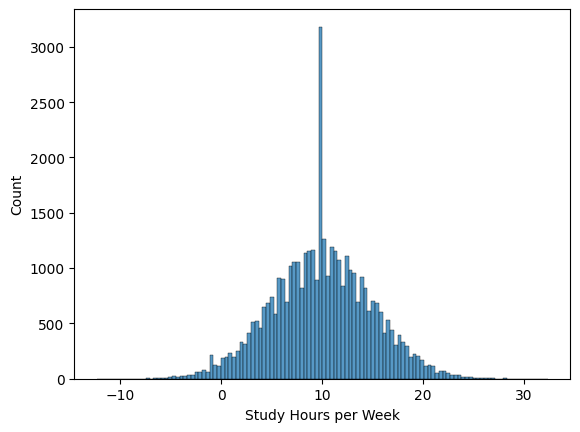

In [17]:
sns.histplot(df["Study Hours per Week"])

<Axes: xlabel='Attendance Rate', ylabel='Count'>

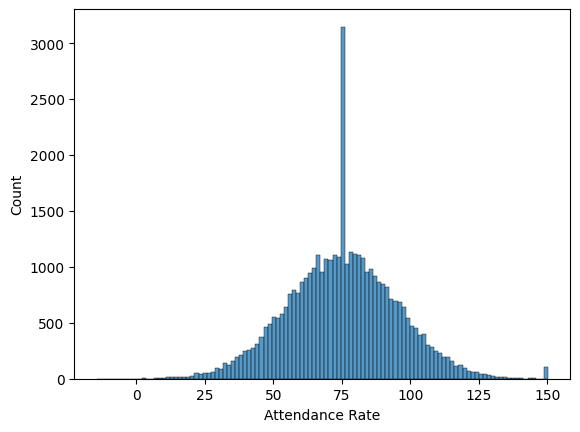

In [18]:
sns.histplot(df["Attendance Rate"])

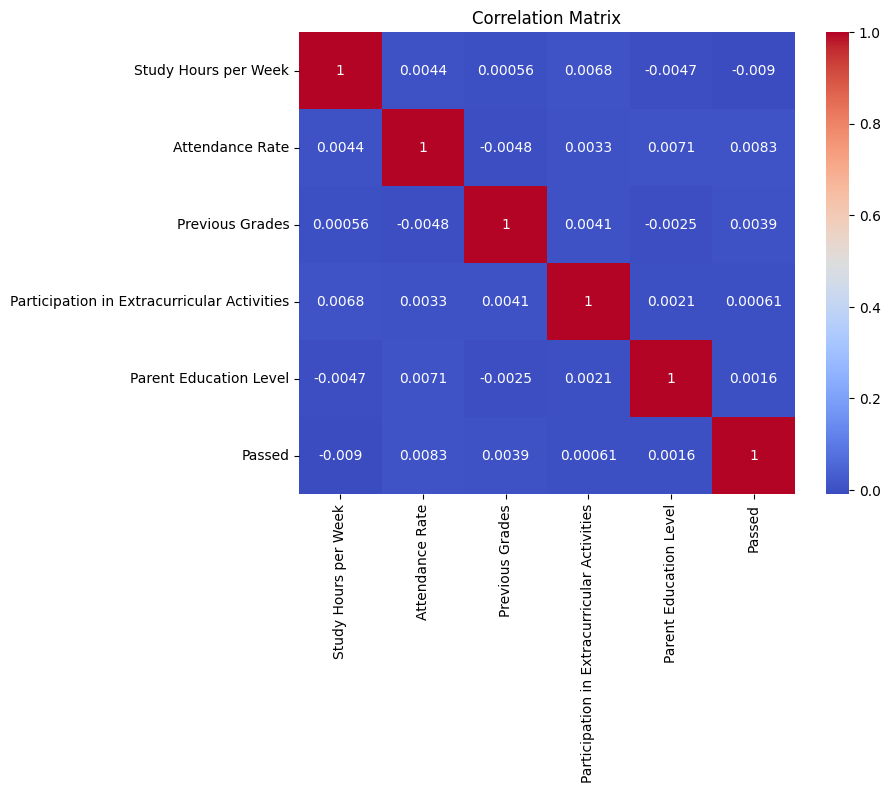

In [19]:
# Compute and visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [20]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1].astype(int)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=33)

In [22]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 30000 entries, 39052 to 23572
Series name: Passed
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 468.8 KB


In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
models = {
    "LogisticRegression" : LogisticRegression(max_iter=1000),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=3),
    "svm" : SVC(kernel='linear'),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "GaussianNB" : GaussianNB(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth=5),
    "GradientBoostingClassifier" : GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

In [25]:



results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"Model: {name} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")
    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1})    

# Convert results to DataFrame for tabular display
df_results = pd.DataFrame(results)
print(df_results)

Model: LogisticRegression | Accuracy: 0.5295 | Precision: 0.6097 | Recall: 0.5295 | F1-Score: 0.3676
Model: KNeighborsClassifier | Accuracy: 0.4983 | Precision: 0.4982 | Recall: 0.4983 | F1-Score: 0.4983
Model: svm | Accuracy: 0.5291 | Precision: 0.2799 | Recall: 0.5291 | F1-Score: 0.3662
Model: RandomForestClassifier | Accuracy: 0.5303 | Precision: 0.5274 | Recall: 0.5303 | F1-Score: 0.3888
Model: GaussianNB | Accuracy: 0.5283 | Precision: 0.5102 | Recall: 0.5283 | F1-Score: 0.3933
Model: DecisionTreeClassifier | Accuracy: 0.5210 | Precision: 0.4975 | Recall: 0.5210 | F1-Score: 0.4329
Model: GradientBoostingClassifier | Accuracy: 0.5244 | Precision: 0.5074 | Recall: 0.5244 | F1-Score: 0.4453
Model: Gradient Boosting | Accuracy: 0.5293 | Precision: 0.5176 | Recall: 0.5293 | F1-Score: 0.4375
Model: Logistic Regression | Accuracy: 0.5295 | Precision: 0.6097 | Recall: 0.5295 | F1-Score: 0.3676
                        Model  Accuracy  Precision  Recall  F1-Score
0          LogisticRegressi

In [26]:
df_results

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.5295,0.609698,0.5295,0.367588
1,KNeighborsClassifier,0.4983,0.498212,0.4983,0.498255
2,svm,0.5291,0.279947,0.5291,0.366159
3,RandomForestClassifier,0.5303,0.527419,0.5303,0.388752
4,GaussianNB,0.5283,0.510215,0.5283,0.393287
5,DecisionTreeClassifier,0.5210,0.497502,0.5210,0.432950
6,GradientBoostingClassifier,0.5244,0.507385,0.5244,0.445299
7,Gradient Boosting,0.5293,0.517637,0.5293,0.437480
8,Logistic Regression,0.5295,0.609698,0.5295,0.367588


In [27]:
model = SVC()
model.fit(X_train, y_train)  # Train model
y_pred = model.predict(X_test)  # Predict on test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"Model: {name} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

Model: Logistic Regression | Accuracy: 0.5292 | Precision: 0.5368 | Recall: 0.5292 | F1-Score: 0.3673
